# SafeComm-Digital-Security-Solutions

Welcome to SafeComm Digital Security Solutions! In the modern digital age, people across the globe
communicate largely through text messages. SMSs have become an integral part of our daily lives.
However, with this ease of communication, there comes a dark side: SMS-based fraud. Unsuspecting
individuals often receive malicious or scam texts intending to deceive or cause harm.
SafeComm has recently partnered with a major telecom provider that has shared anonymized SMS
data. This dataset comprises a mix of regular day-to-day messages and some potentially fraudulent
ones. The objective is to design a mechanism that identifies and flags these fraudulent messages
automatically. This way, we can warn users or even prevent these messages from being delivered
altogether.

# *Dataset features*

• Fraudulent: Binary indicator if the SMS is fraudulent (1 for Yes, 0 for No)

• SMS Text: The content of the SMS

• ID: A unique identifier for each SMS

• Date and Time: Timestamp indicating when the SMS was sent

# *Assignment*

• Perform an Explanatory data analysis (EDA) with visualization using the entire dataset..

• Preprocess the dataset (impute missing values, encode categorical features with one-hot
encoding). Your goal is to estimate whether an SMS is fraudulent

• Define whether this is a regression, classification or clustering problem, explain why and
choose your model design accordingly. Test at least 3 different models. First, create a
validation set from the training set to analyze the behaviour with the default
hyperparameters. Then use cross-validation to find the best set of hyperparameters. You
must describe every hyperparameter tuned (the more, the better)

• Select the best architecture using the right metric

• Compute the performances of the test set

• Explain your results

In [309]:
import numpy as np
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import requests
import zipfile
import os

from nltk.tokenize import word_tokenize
import nltk, spacy
import re, string, unicodedata
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


## EDA analysis ##

* Understanding the Dataset: We use python libraries to scan the dataset and gain insight of its structure

* Checking for Integrity: We scan the dataset to identify NaN values and check if the dataset is consistent

* Visualize Distribution of Data: using sns and matplotlib we can see how the data is structured in the cartesian plane

* Use pairplots for identify relationships: Apparently not necessary

# Showing the dataframe

* here we display the complete dataset in a dataframe with 4 columns:
  - *Fraudolent*: a binary value, that acts like a boolean, that assumes the value of 0 when the sms is not spam; 1 when it is fraudolent.
  - *SMS test*: a string of text, representing an sms.
  - *ID*: a unique alphanumeric code of 7 digits that represents the sms message.
  - *Date and Time*: time in which the message has been sent (it is formatted as date and time)

* Plus, for operational purposes, we needed to reformat the name of the *SMS test* and *Date and Time* columns.

In [310]:
sms_df = pd.read_csv("sms.csv")
sms_df.rename(columns={'SMS test': 'SMS_test'}, inplace=True)
sms_df.rename(columns={'Date and Time': 'Date_and_Time'}, inplace=True)
sms_df.head()

,Fraudolent,SMS_test,ID,Date_and_Time
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,1EWYRBL,2017-12-02
1,0,And also I've sorta blown him off a couple tim...,ZY4PDK7,2018-03-23
2,0,Mmm thats better now i got a roast down me! i...,KLUX2C6,2016-10-29
3,0,Mm have some kanji dont eat anything heavy ok,955HXJ0,2018-04-12
4,0,So there's a ring that comes with the guys cos...,00Q6EUC,2016-08-01


In [311]:
print("Rows:",sms_df.shape[0]) # In this way we gain knowledge about the real dimensions of the dataset in terms of rows

Rows: 5572


In [312]:
# Count NaN values in the dataset
nan_count = sms_df.isna().sum()

# Display the count of NaN values for each column
print("NaN values in each column:")
print(nan_count)

NaN values in each column:
Fraudolent       0
SMS_test         0
ID               0
Date_and_Time    0
dtype: int64


Fortunately we don't have NaN values in the dataset, so it is consistent and we do not need to impute missing values.

In [313]:
print("\nFraudolent column summary:")
print(sms_df['Fraudolent'].value_counts())

#Here we can clearly see that there are 4825 Non-Fraudolent messages and 747 Fraudolent messages.
fraudolent_count = sms_df['Fraudolent'].value_counts()[1]
non_fraudolent_count = sms_df['Fraudolent'].value_counts()[0]

percentage_fraudolent = (fraudolent_count / (fraudolent_count + non_fraudolent_count)) * 100
percentage_non_fraudolent = (non_fraudolent_count / (fraudolent_count + non_fraudolent_count)) * 100

print("Percentage of fraudolent messages:", percentage_fraudolent,'%')
print("Percentage of non-fraudolent messages:", percentage_non_fraudolent,'%')
#furthermore we have displayed the percentage of fraudolent and non-fraudolent messages in the dataset. We can see that the dataset is unbalanced, favouring non-fraudolent messages.


Fraudolent column summary:
0    4825
1     747
Name: Fraudolent, dtype: int64
Percentage of fraudolent messages: 13.406317300789663 %
Percentage of non-fraudolent messages: 86.59368269921033 %


* Here we can clearly see that there are 4825 Non-Fraudolent messages and 747 Fraudolent messages.

* Furthermore we have displayed the percentage of fraudolent and non-fraudolent messages in the dataset. We can see that the dataset is unbalanced, favouring non-fraudolent messages.

## Data Distribution and Correlations ##

* In this section, we are analyzing the distribution of data in te cartesian plane utilizing sns and matplotlib tools.

* In particular, it seems that the most interesting feature to study in the dataset (in terms of distribution analysis) is the *Fraudolent* column.

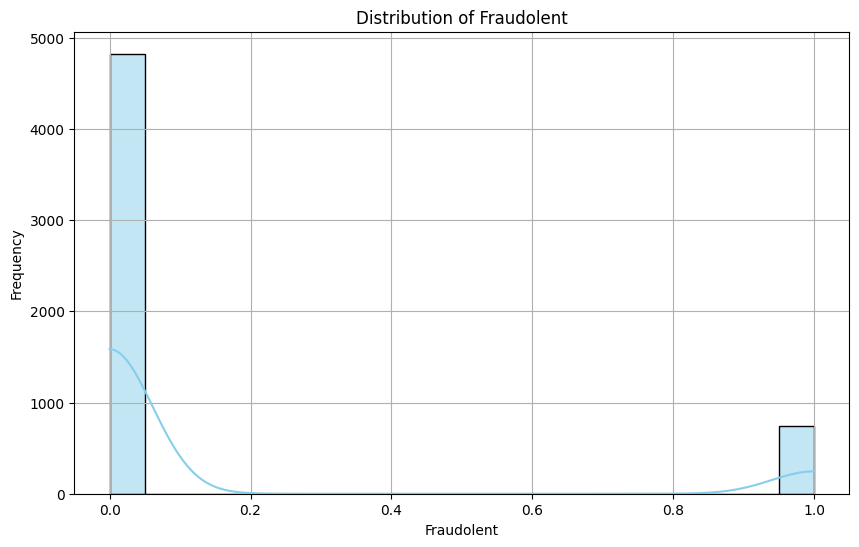

In [314]:

column_to_analyze = 'Fraudolent'

# Create a distribution plot (histogram) to visualize the data
plt.figure(figsize=(10, 6))
sns.histplot(sms_df[column_to_analyze], kde=True, bins=20, color='skyblue')
plt.title(f'Distribution of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

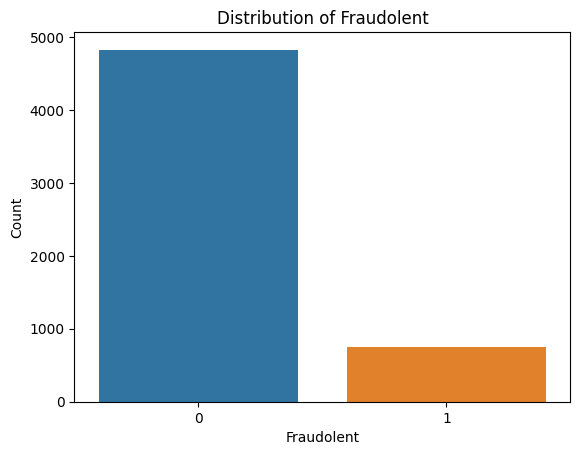

In [315]:
# Visualize the distribution of Fraudolent
sns.countplot(data=sms_df, x='Fraudolent')
plt.title('Distribution of Fraudolent')
plt.xlabel('Fraudolent')
plt.ylabel('Count')
plt.show()

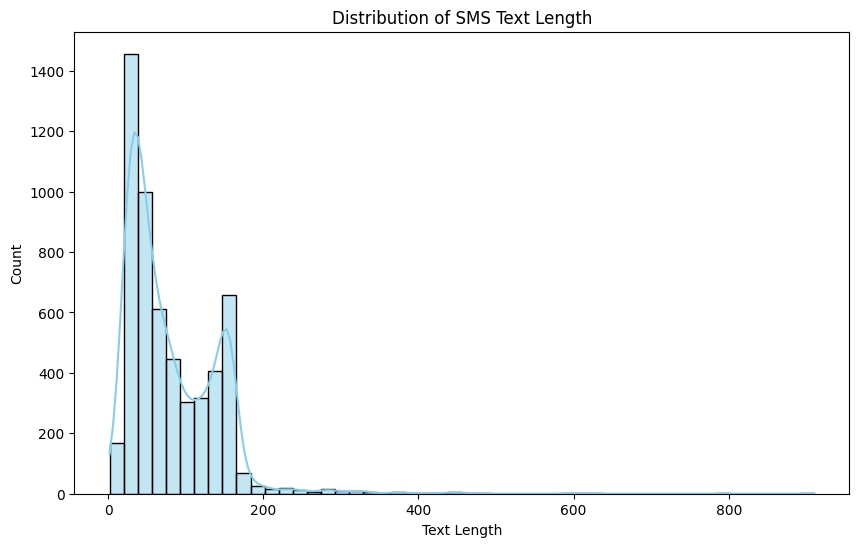

In [316]:
sms_df['text_length'] = sms_df['SMS_test'].apply(len)

# Visualize text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=sms_df, x='text_length', kde=True, bins=50, color='skyblue')
plt.title('Distribution of SMS Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

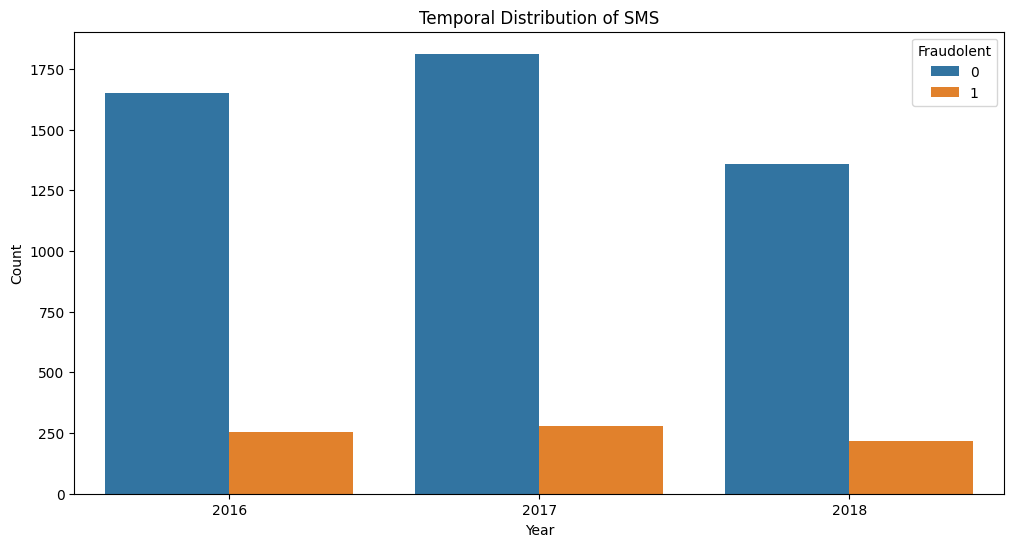

In [317]:
# Assuming the Date and Time column is named 'Date_and_Time'
sms_df['Date_and_Time'] = pd.to_datetime(sms_df['Date_and_Time'])

# Extract date and time components
sms_df['Year'] = sms_df['Date_and_Time'].dt.year
sms_df['Month'] = sms_df['Date_and_Time'].dt.month
sms_df['Day'] = sms_df['Date_and_Time'].dt.day

# Visualize temporal distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Fraudolent', data=sms_df)
plt.title('Temporal Distribution of SMS')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<ipython-input-318-43d728a11383>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_dropped.corr()


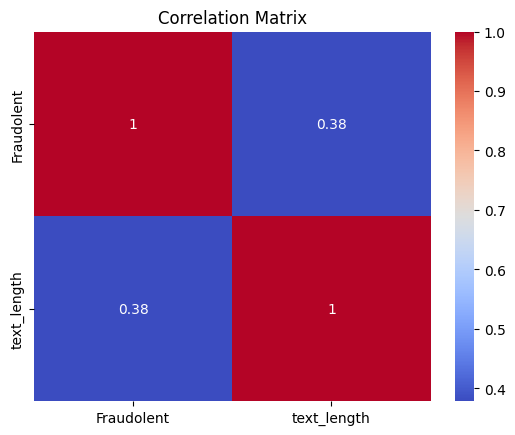

In [318]:
# Doing the correlation matrix we need only to correlate the Fraudolent feature with the text length, so we can drop the other columns (ID, Date_and_Time, Year, Month, Day)
df_dropped = sms_df.drop(['Year', 'Month', 'Day', 'ID', 'Date_and_Time'], axis=1, inplace=False)
correlation_matrix = df_dropped.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Given the correlations calculated, we can see that there is no strong correlation whatsoever between text_length and Fraudolent values. This means that we can use all of them for our analysis.
#We can also see that the correlation between the variables is not strong enough to cause multicollinearity issues.
#we can interpet the correlation between Fraudolent and text_length as as weak correlation at most.

In [319]:
sms_df.columns
#By splitting the date into its compoonents, we can analyze the temporal distribution of the messages.
earliest_date = sms_df['Date_and_Time'].min()
latest_date = sms_df['Date_and_Time'].max()
print("Earliest date of an SMS message sent:", earliest_date)
print("Latest date of an SMS message sent:", latest_date)
#this allows us to see that in our dataset the range of years for which we are viewing sent SMS Messages is from 2016 to 2018

sms_df.corr()
#Given the correlations calculated, we can see that there is no strong correlation whatsoever between the variables. This means that we can use all of them for our analysis.
#We can also see that the correlation between the variables is not strong enough to cause multicollinearity issues.
#we can interpet the correlation between Fraudolent and text_length as as weak correlation at most.

Earliest date of an SMS message sent: 2016-02-15 00:00:00
Latest date of an SMS message sent: 2018-09-19 00:00:00


<ipython-input-319-4f45f72fddba>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sms_df.corr()


,Fraudolent,text_length,Year,Month,Day
Fraudolent,1.000000,0.378359,0.004349,-0.004380,-0.004535
text_length,0.378359,1.000000,0.029498,-0.010077,0.014077
Year,0.004349,0.029498,1.000000,-0.304300,-0.054934
Month,-0.004380,-0.010077,-0.304300,1.000000,0.007355
Day,-0.004535,0.014077,-0.054934,0.007355,1.000000


* By analyzing the correlation matrix, we can determine the following:
    
    • The correlation coefficient ranges from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.
    
    • Positive correlation coefficients indicate that the variables tend to increase or decrease together.
    
    • Negative correlation coefficients indicate that as one variable increases, the other tends to decrease.
   
    • The closer the correlation coefficient is to 1 or -1, the stronger the correlation.
    
    • A correlation coefficient close to O indicates no or weak correlation.

* Based on the correlation matrix, we can conclude that there is no strong correlation between the two most importanto variables in the dataset. This means that all variables can be used for analysis without causing multicollinearity issues.

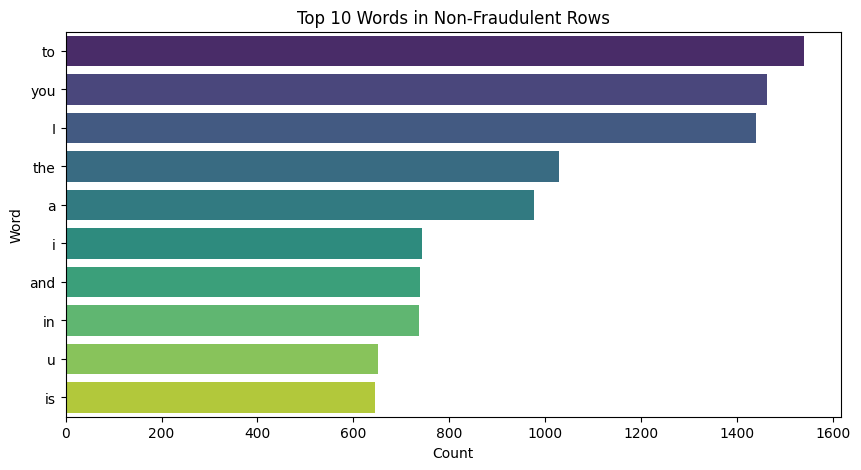

In [321]:
non_fraudulent_text = ' '.join(df_dropped[df_dropped['Fraudolent'] == 0]['SMS_test'])

words = non_fraudulent_text.split()
word_counts = pd.Series(words).value_counts()

word_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})

plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=word_df.head(10), palette='viridis')
plt.title('Top 10 Words in Non-Fraudulent Rows')
plt.show()

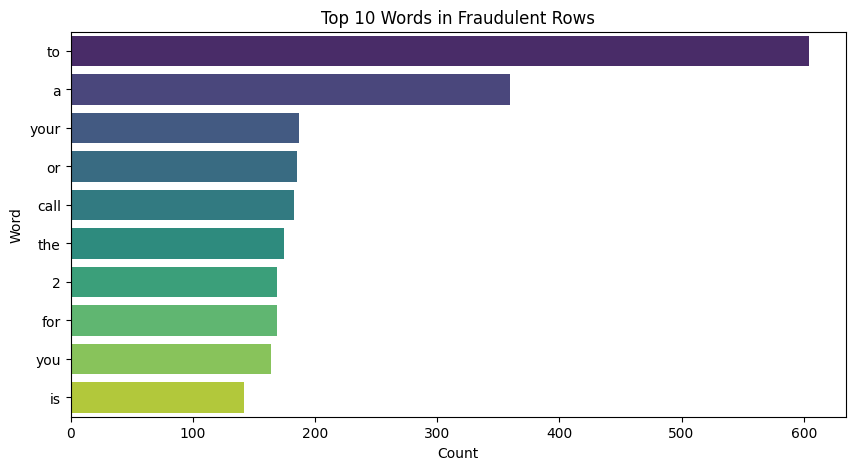

In [322]:
fraudulent_text = ' '.join(df_dropped[df_dropped['Fraudolent'] == 1]['SMS_test'])

words = fraudulent_text.split()
word_counts = pd.Series(words).value_counts()

word_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})

plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=word_df.head(10), palette='viridis')
plt.title('Top 10 Words in Fraudulent Rows')
plt.show()

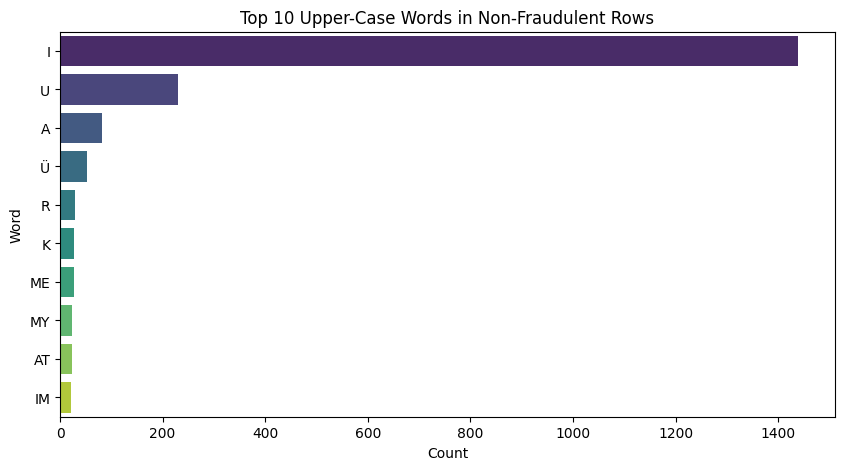

In [323]:
non_fraudulent_UC_text = ' '.join(df_dropped[df_dropped['Fraudolent'] == 0]['SMS_test'])

capital_words = [word for word in non_fraudulent_UC_text.split() if word.isupper()]


words = non_fraudulent_UC_text.split()
word_counts = pd.Series(capital_words).value_counts()


word_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})

plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=word_df.head(10), palette='viridis')
plt.title('Top 10 Upper-Case Words in Non-Fraudulent Rows')
plt.show()

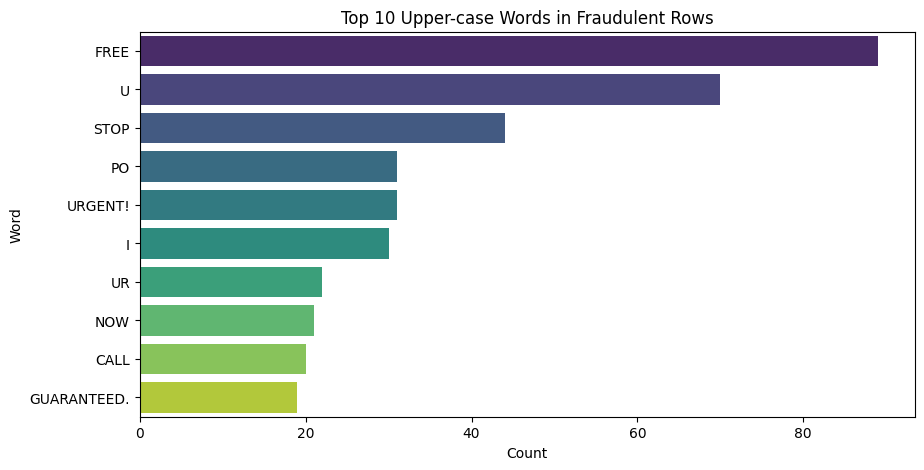

In [324]:
fraudulent_text = ' '.join(df_dropped[df_dropped['Fraudolent'] == 1]['SMS_test'])

capital_words = [word for word in fraudulent_text.split() if word.isupper()]
word_counts = pd.Series(capital_words).value_counts()

word_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})[:11]


plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=word_df.head(10), palette='viridis')
plt.title('Top 10 Upper-case Words in Fraudulent Rows')
plt.show()

* We have noticed that fraudulent messages contain some words that are particular and unique. So, we decided to take in consideration the 10 Upper-Case most frquent words in fraudulent messages in order to find a correlation in the matrix with text lenght and obviously the fraudulence.

In [325]:
most_frequent_words_set = set(word_df['Word'])

df_dropped['word_presence'] = df_dropped['SMS_test'].apply(lambda x: any(word in most_frequent_words_set for word in x.split()))

df_dropped['word_presence'] = df_dropped['word_presence'].astype(int)

print(df_dropped['word_presence'].value_counts())

0    4024
1    1548
Name: word_presence, dtype: int64


<ipython-input-326-2a794fbdb621>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_dropped.corr()


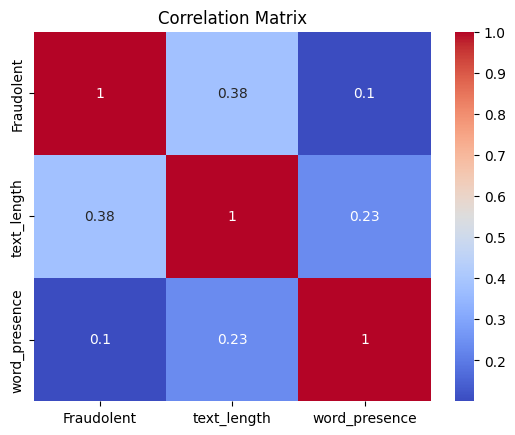

In [326]:
correlation_matrix = df_dropped.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

* In this section we will try to transform the data into a more suitable format for machine learning Algorithms, using various methods: cleaning data, encoding categorial features, scaling numerical features.




In [328]:

X = df_dropped
y = df_dropped['Fraudolent']

X_fraudulent = X[y == 1]
X_non_fraudulent = X[y == 0]
y_fraudulent = y[y == 1]
y_non_fraudulent = y[y == 0]

X_fraudulent_still, _, y_fraudulent_still, _ = train_test_split(X_fraudulent, y_fraudulent, test_size=0.001, random_state=42)

X_non_fraudulent_halved, _, y_non_fraudulent_halved, _ = train_test_split(X_non_fraudulent, y_non_fraudulent, test_size=0.75, random_state=42)

df_X_final = pd.concat([X_fraudulent_still, X_non_fraudulent_halved])
df_y_final = pd.concat([y_fraudulent_still, y_non_fraudulent_halved])

print(df_y_final.value_counts())
df_X_final.head()

0    1206
1     746
Name: Fraudolent, dtype: int64


,Fraudolent,SMS_test,text_length,word_presence
1995,1,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...,151,1
794,1,Had your contract mobile 11 Mnths? Latest Moto...,159,0
1107,1,You have 1 new message. Please call 08712400200.,48,0
2970,1,Buy Space Invaders 4 a chance 2 win orig Arcad...,154,0
3649,1,it to 80488. Your 500 free text messages are v...,74,0


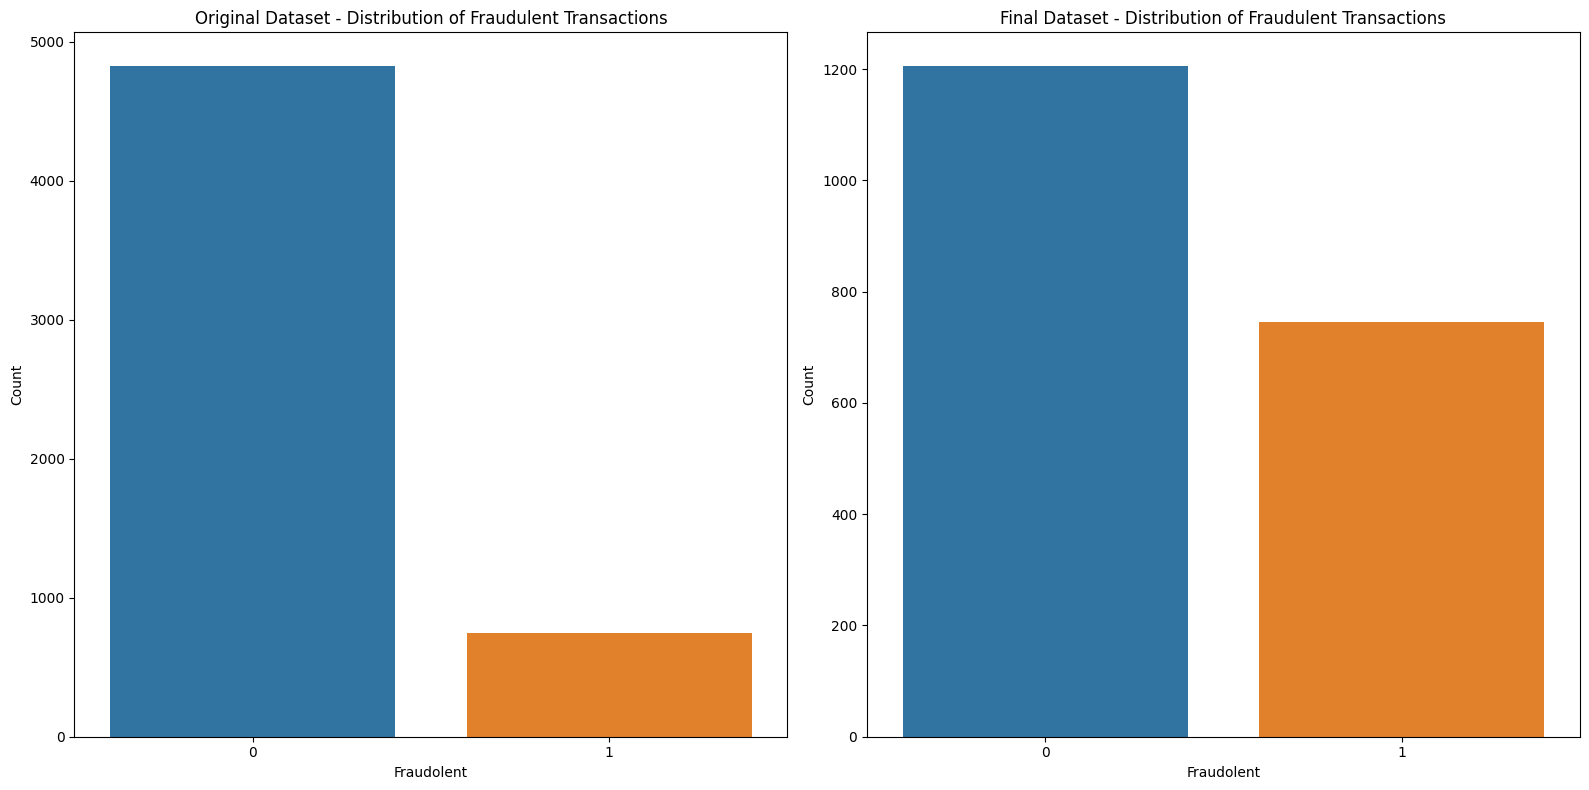

In [329]:
# Set up the figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Original dataset histogram
sns.countplot(x='Fraudolent', data=df_dropped, ax=axes[0])
axes[0].set_title('Original Dataset - Distribution of Fraudulent Transactions')
axes[0].set_xlabel('Fraudolent')
axes[0].set_ylabel('Count')

# Final dataset histogram
sns.countplot(x='Fraudolent', data=df_X_final, ax=axes[1])
axes[1].set_title('Final Dataset - Distribution of Fraudulent Transactions')
axes[1].set_xlabel('Fraudolent')
axes[1].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [330]:
#download the stopwords
nltk.download('stopwords')

#Tokenization of text
tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [331]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#apply function on SMS_test column
df_X_final['SMS_test']=df_X_final['SMS_test'].apply(strip_html)

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#apply function on SMS_test column
df_X_final['SMS_test']=df_X_final['SMS_test'].apply(remove_between_square_brackets)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#apply function on SMS_test column
df_X_final['SMS_test']=df_X_final['SMS_test'].apply(denoise_text)



#Define function for removing special characters
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#apply function on SMS_test column
df_X_final['SMS_test']=df_X_final['SMS_test'].apply(remove_special_characters)

def stem_text(text):
  stemmer = PorterStemmer()
  words = word_tokenize(text.lower())
  stemmed_words = [stemmer.stem(word) for word in words if word.isalpha()]
  return " ".join(stemmed_words)

#apply function on SMS_test column
df_X_final['SMS_test']=df_X_final['SMS_test'].apply(stem_text)

#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#apply function on SMS_test column
df_X_final['SMS_test']=df_X_final['SMS_test'].apply(remove_stopwords)


<ipython-input-331-12c6bc0eedb4>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


{'can', 'herself', 'did', 'this', "weren't", "needn't", 'further', 'such', 'up', 'off', 'no', 'whom', 'being', 'for', 'they', 'has', 'yourselves', 'other', "hasn't", 'shouldn', 'should', 'out', 'few', 'itself', 'while', 'your', 'same', 'wasn', 'all', "you'd", 'nor', 'until', 'ourselves', "won't", 'than', 'o', 'the', 'me', 'ma', 'there', 'she', 'aren', 'shan', 'our', 'so', 'm', 'its', 'once', 'only', 'hadn', 'having', 're', 'needn', 'and', 'against', 'if', 'don', "it's", "wasn't", 'by', 'before', "couldn't", 'about', 'these', "mightn't", "mustn't", 'under', 'where', 'it', "isn't", 'will', "don't", 'after', 'couldn', "doesn't", 'in', 'does', 'now', 'hers', 'but', "didn't", 'my', 'ours', 'y', 'been', "hadn't", 'below', 'theirs', 'those', 't', "haven't", 'was', "shan't", 'over', 'why', 'yours', 'are', 've', 'at', 'very', 'weren', 'each', 'am', 'which', 'again', 'then', 'them', 'of', "shouldn't", "she's", 'himself', 'him', 'from', 'mustn', 'how', "should've", 'd', 'doing', 'both', 'some', "

# Bag of Words

In [332]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

#transformed dataset
BoW_X=cv.fit_transform(df_X_final['SMS_test'])

print('BOW_X:', BoW_X.shape)



BOW_X: (1952, 21119)


# Models

In [333]:

X = BoW_X  #Data
y = df_X_final['Fraudolent'] #target

# Split the dataset into train and test sets
# Adding the "stratify" parameter seems not changing at all the distribution of values, that anyway seems very well distributed in the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}, y_train_tmp shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1561, 21119), y_train_tmp shape: (1561,)
X_test shape: (391, 21119), y_test shape: (391,)


# SVC

0.9205637411915438
0.7237851662404092
Accuracy:  0.7237851662404092
Precision:  0.6722689075630253
Recall:  0.5369127516778524
F1 Score:  0.5970149253731344


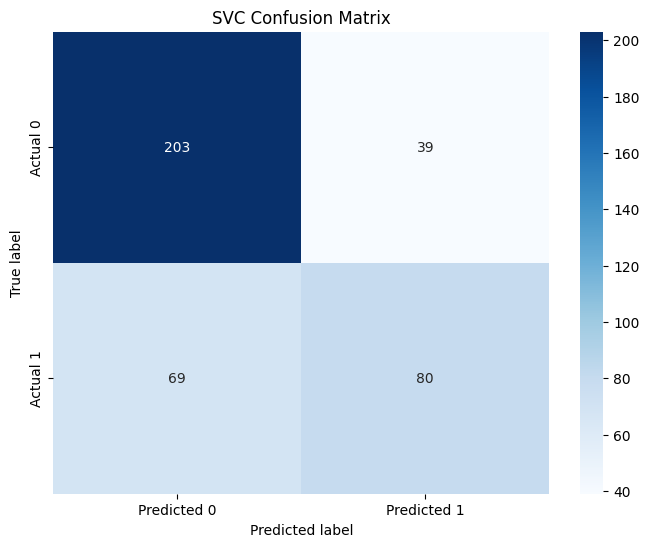

In [360]:
model_svc = SVC()

model_svc.fit(X_train, y_train)
print(model_svc.score(X_train, y_train))

y_pred = model_svc.predict(X_test)

print(model_svc.score(X_test, y_test))

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [335]:

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

grid_search = GridSearchCV(model_svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_model)
print(best_params)


SVC(C=0.1, gamma=1)
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


0.7469570787956438
0.7519181585677749
Accuracy:  0.7519181585677749
Precision:  0.776595744680851
Recall:  0.4899328859060403
F1 Score:  0.6008230452674898


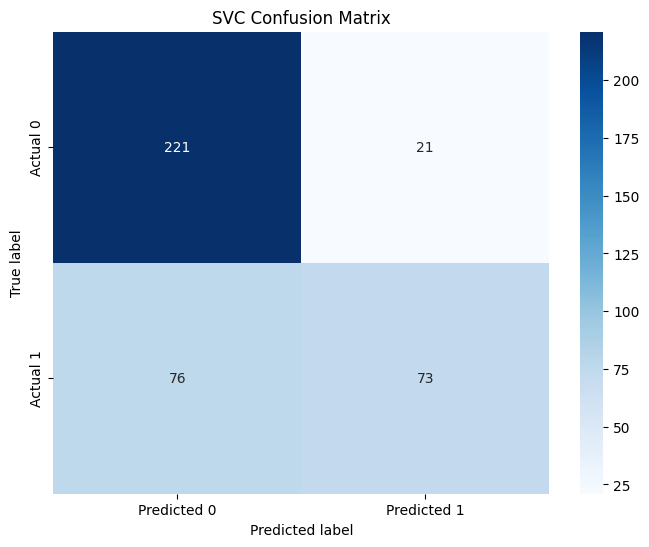

In [359]:
model_svc_upd = SVC(C=0.1, gamma=1, kernel='rbf')

model_svc_upd.fit(X_train, y_train)
print(model_svc_upd.score(X_train, y_train))

y_pred = model_svc_upd.predict(X_test)

print(model_svc_upd.score(X_test, y_test))

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Random Forest

0.9519538757206919
0.38107416879795397
Accuracy:  0.38107416879795397
Precision:  0.38107416879795397
Recall:  1.0
F1 Score:  0.5518518518518518


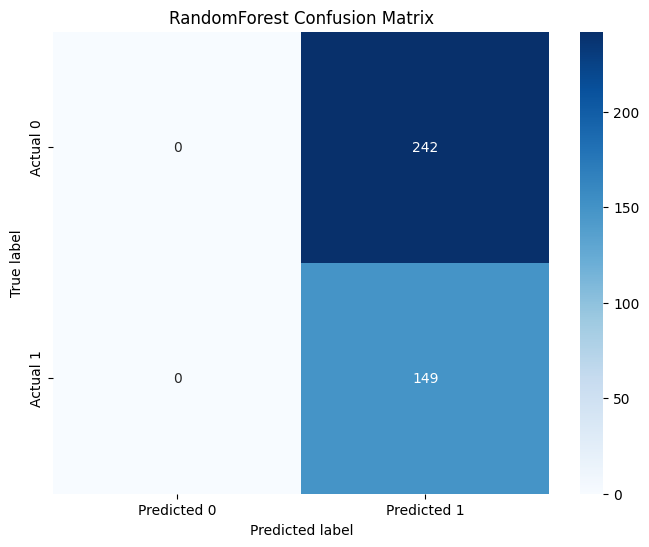

In [362]:

model_RFC = RandomForestClassifier()

model_RFC.fit(X_train, y_train)
print(model_RFC.score(X_train, y_train))

y_pred = model_RFC.predict(X_test)

print(model_RFC.score(X_test, y_test))

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [357]:
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'none'],  # Type of regularization
    'solver': ['liblinear', 'saga']

}

random_search = RandomizedSearchCV(model_RFC, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f'Best Parameters: {best_params}')

KeyboardInterrupt: ignored

In [358]:

param_grid = {
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'none'],  # Type of regularization
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(model_RFC, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_model)
print(best_params)

KeyboardInterrupt: ignored

0.6175528507367073
0.618925831202046
Accuracy:  0.618925831202046
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


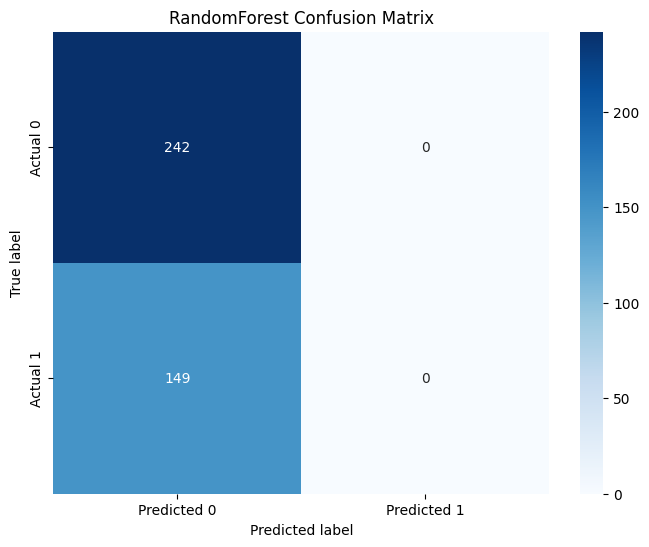

In [353]:

model_RFC_upd = RandomForestClassifier(n_estimators= 50, min_samples_split=10, min_samples_leaf= 4, max_depth=4)

model_RFC_upd.fit(X_train, y_train)
print(model_RFC_upd.score(X_train, y_train))

y_pred = model_RFC_upd.predict(X_test)

print(model_RFC_upd.score(X_test, y_test))

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)


# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

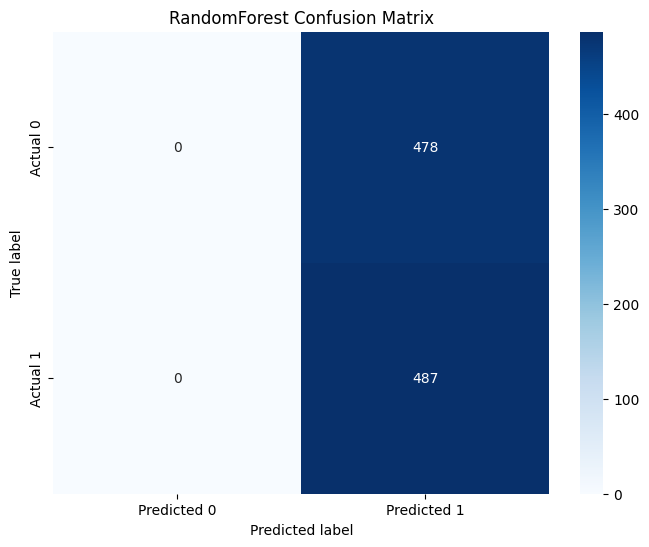

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Multinomial NB

In [262]:
model_MNB = MultinomialNB()

model_MNB.fit(X_train, y_train)
print(model_MNB.score(X_train, y_train))

y_pred = model_MNB.predict(X_test)

print(model_MNB.score(X_test, y_test))

0.8225496476617553
0.27621483375959077


In [263]:

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
}

grid_search = GridSearchCV(model_MNB, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_model)
print(best_params)

MultinomialNB(alpha=2.0)
{'alpha': 2.0}


In [273]:
model_MNB_upd = MultinomialNB(alpha=2)

model_MNB_upd.fit(X_train, y_train)
print(model_MNB_upd.score(X_train, y_train))

y_pred = model_MNB_upd.predict(X_test)

print(model_MNB_upd.score(X_test, y_test))


0.8225496476617553
0.30179028132992325


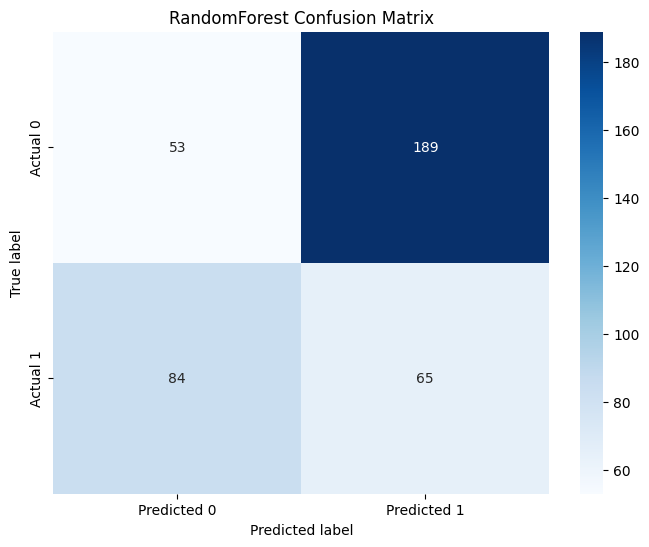

In [274]:

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()